## import modules

In [7]:
import numpy as np
from compname import ChemFormula, TriChemFormula
from trigraph import TriView
from optim import BayesOpt

## load data

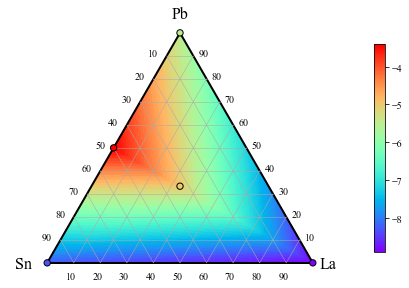

In [8]:
# Create chemical formula
atoms = ["Pb", "Sn", "La"]
tcf = TriChemFormula()

# Create comp name
comp_all = tcf.get_tri_name(atoms, delta = 0.05)
X_all = tcf.get_only_pseudo_ratio(comp_all,  atoms)

# Experimental composition and results
comp_exp = ["PbF2", "SnF2", "LaF3", "PbSnF4", "PbSnLaF7"]
X_exp = tcf.get_only_pseudo_ratio(comp_exp,  atoms)
y_exp = np.array([-5.5, -8.3, -8.9, -3.4, -5])

# triangle diagram of learning data
tv = TriView()
graph_load = tv.get_tri_graph(atoms, X_exp, y_exp)
graph_load = tv.add_plot(graph_load, X_exp, y_exp)

## Bayesian Optimization

In [9]:
bo = BayesOpt(X_all)
bo.fit(X_exp, y_exp)
mu, sigma, ei = bo.get_info()

## Output triangle diagram

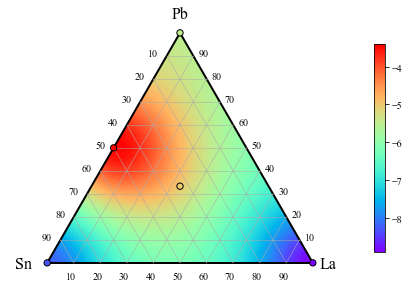

In [10]:
# Diagram of mu by Gaussian process
graph_mu = tv.get_tri_graph(atoms, X_all, mu)
graph_mu = tv.add_plot(graph_mu, X_exp, y_exp)

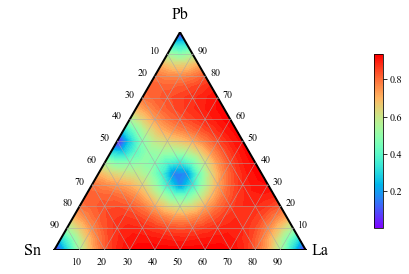

In [11]:
# Diagram of sigma by Gaussian process
graph_sigma = tv.get_tri_graph(atoms, X_all, sigma)

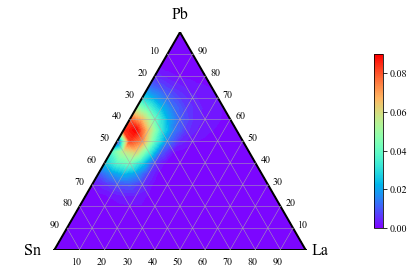

In [12]:
# Diagram of ei by Gaussian process
graph_ei = tv.get_tri_graph(atoms, X_all, ei)

## Experimental composition recommended by Bayesian optimization.